# The objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Main stats packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
#sklearn packages
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

#### Read the data

Load the csv file and set the first column as index

In [46]:
df_car = pd.read_csv("car_price.csv")
df = df_car.copy()
df.set_index("Car_Name",inplace = True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


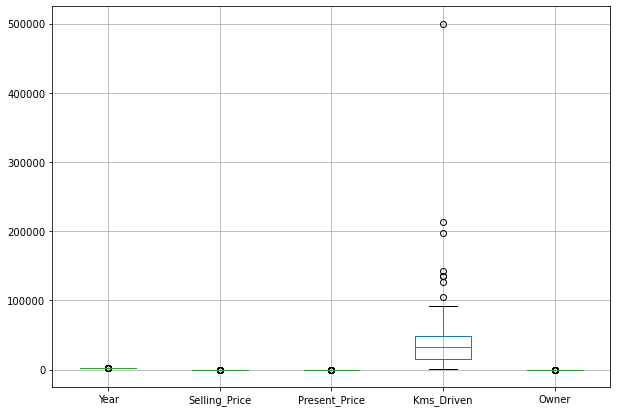

In [22]:
plt.figure(figsize =(10,7))
df.boxplot()
plt.show()

In [23]:
df.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
df.skew()

Year            -1.246189
Selling_Price    2.493422
Present_Price    4.083150
Kms_Driven       6.436013
Owner            7.616850
dtype: float64

In [48]:
df = pd.get_dummies(data= df,columns = ['Fuel_Type',"Seller_Type","Transmission"],drop_first=True)

In [51]:
X = df.drop("Selling_Price",axis =1)
X = sm.add_constant(X)
y = df['Selling_Price']
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          5.71e-131
Time:                        22:48:23   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [ ]:
# Here we could see,Intercept(B0) = -789 Thats means When idependent features are zero then selling price is -789.
# And also we can see that Coefficients are there in our model thats shows values where independent varibles moves 1 unit that
# y_increases the that much (selling price increases/decreases).
# We could also see that the p_values which tells which are the predictors are significant with responsible variables
#and which are not significant.
# And ANOVA f_statstics p_value is lesser then 0.05 value so model is significant.
# And Condition number is higher,That means So features are MUlticollinearities.
# Durbin Watson test refers There is no Auto correlation between residuals.
#JB test is tells us the normality test for residuals.Which are not normaly distributed
# These are the Assumtions, Thats should be satisfied for Linear regression.
# Statndard error is mention that Our model is predicting the difference of std_error.

In [53]:
MLR_model.condition_number

45584031.31228172

In [54]:
# As we above Condition number there is multicollinearity.

In [60]:
corr = df.drop("Selling_Price",axis = 1).corr()

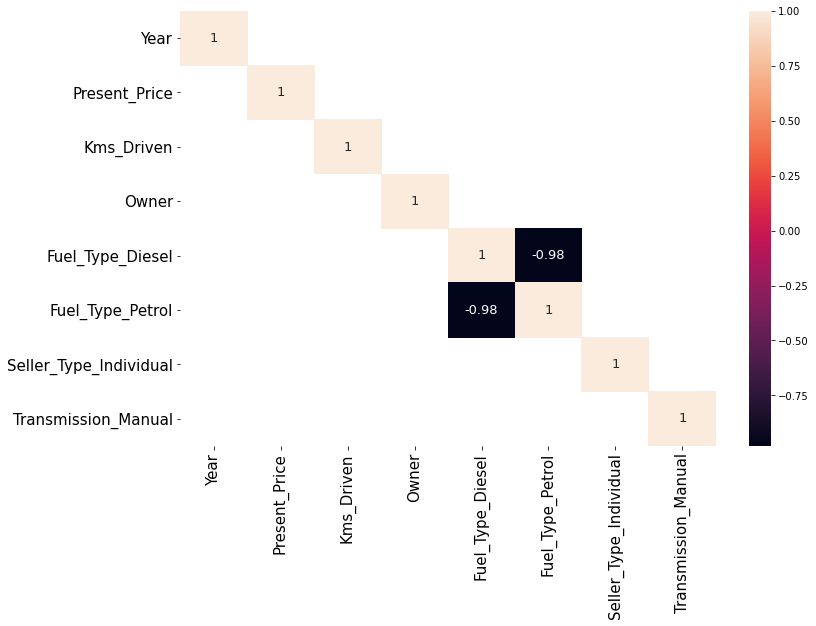

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(corr[np.abs(corr)>.8],annot= True,annot_kws={"size":13})
plt.xticks(fontsize=15)
plt.yticks(fontsize =15)
plt.show()

In [ ]:
# We can see that Fuel_Type_Diesel and Feul_type_petrol has multycollinearity.

In [73]:
vif = pd.DataFrame()
df_num = df.drop("Selling_Price",axis = 1).select_dtypes("number")

In [74]:
vif['Features'] = df_num.columns

In [79]:
vif["vif_value"] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif

,Features,vif_value
0,Year,165.505933
1,Present_Price,3.256794
2,Kms_Driven,2.041561
3,Owner,1.066093
4,Fuel_Type_Diesel,31.417994
5,Fuel_Type_Petrol,121.493777
6,Seller_Type_Individual,2.229915
7,Transmission_Manual,8.878733


In [ ]:
# As we see the above VIF data frame  year feature  fuel)type_Diesel are more multicollinearity.
# So we should remove the column one by one untill no multicollinearity by high value.

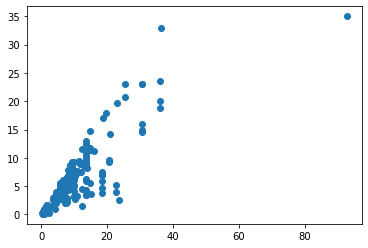

In [81]:
plt.scatter(df['Present_Price'],df['Selling_Price'])
plt.show()

In [ ]:
# We could see that there is a positive relaton between them that means Present_price is increases the selling price is also increases.

In [84]:
X = df['Present_Price']
y = df['Selling_Price']
X = sm.add_constant(X)
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           3.60e-98
Time:                        23:38:04   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847

In [ ]:
# We could see that coeffient is 0.5168 thats means the present price increase in 1 unit then selling price increase .5168k.
# And also see that Rsquare and Adjustant Rsquare are approximatly equal That means Pressing has impact on the selling price
# Constant showing that when present_price is zero that selling price is .71815k
#P_value also suggest us this is feature is significant.

In [85]:
X = df.drop("Selling_Price",axis = 1)
X = sm.add_constant(X)
y = df['Selling_Price']
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Thu, 14 Oct 2021   Prob (F-statistic):          5.71e-131
Time:                        23:46:12   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [ ]:
# We could see the every feature's p_values and decide that there are 3 feature are not significantly difference.
# Those features are not create any impact on the dependent feature.
# Those are Owner,Fuel_type_Petrol and Fuel_type_Diesel.

In [92]:
sm.OLS(y,X).fit().pvalues[sm.OLS(y,X).fit().pvalues>0.05]

Owner               0.111767
Fuel_Type_Diesel    0.054287
Fuel_Type_Petrol    0.629637
dtype: float64

In [ ]:
# These are the columns are not significicantly contribute to the selling prices.

In [95]:
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          5.71e-131
Time:                        00:20:40   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [116]:
X = df.drop("Selling_Price",axis = 1)
X = pd.concat([X,df['Year']*df['Present_Price']],axis=1)

In [118]:
X = sm.add_constant(X)
y = df['Selling_Price']
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     951.5
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          4.57e-210
Time:                        00:29:57   Log-Likelihood:                -401.97
No. Observations:                 301   AIC:                             823.9
Df Residuals:                     291   BIC:                             861.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     92

In [ ]:
# As we see the difference difference between the 2 models rsquare and adjustant rsqaure, after using the interaction effect
# method the model accuracy was increased this because of intaraction effect.
# That means if one indemendent variable change other independent should be change rather changing some feature might be stable
# (constant) so its not create any impact so we use this method.

In [121]:
X = df[['Fuel_Type_Diesel',"Fuel_Type_Petrol"]]
y = df['Selling_Price']
X = sm.add_constant(X)
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     65.41
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           2.80e-24
Time:                        00:43:05   Log-Likelihood:                -861.21
No. Observations:                 301   AIC:                             1728.
Df Residuals:                     298   BIC:                             1740.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1000      3.006  

In [ ]:
# There is no much impact an fuel type mainy the feul_type_petrol is not playing major role on selling price.

In [128]:
X= df.drop(["Transmission_Manual","Selling_Price"],axis= 1)
y = df['Selling_Price']
X = sm.add_constant(X)
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     292.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          3.95e-128
Time:                        00:50:42   Log-Likelihood:                -603.36
No. Observations:                 301   AIC:                             1223.
Df Residuals:                     293   BIC:                             1252.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -833

In [129]:
X = df.drop('Selling_Price',axis =1)
y = df['Selling_Price']
X = sm.add_constant(X)
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          5.71e-131
Time:                        00:51:55   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [ ]:
# Yes Its reducing the Standard error So we can assure that our model predict the values by 86.5 difference when comparing to the 

In [140]:
X = df['Present_Price']
y = df['Selling_Price']
X = sm.add_constant(X)
SLR_model = sm.OLS(y,X).fit()
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     1016.
Date:                Fri, 15 Oct 2021   Prob (F-statistic):           3.60e-98
Time:                        01:05:55   Log-Likelihood:                -693.08
No. Observations:                 301   AIC:                             1390.
Df Residuals:                     299   BIC:                             1398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7185      0.187      3.847      0.000       0.351       1.086
Present_Price     0.5168      0.016     31.874      0.000       0.485       0.549
==============================================================================
Omnibus:                       59.775   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.121
Skew:                           0.084   Prob(JB):                    7.86e-202
Kurtosis:                      11.592   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
SLR_model.conf_int(alpha = 0.05)

,0,1
const,0.350972,1.086083
Present_Price,0.484938,0.548760


In [142]:
SLR_model.conf_int(alpha=0.01)

,0,1
const,0.234343,1.202712
Present_Price,0.474812,0.558886


In [ ]:
# we see that when cofidance interval increases the lower level decreasing and upper value increasing
# if our slope fall in these ranges then Present_price is not signicifant.

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [152]:
X = df['Present_Price']
y = df['Selling_Price']
X = sm.add_constant(X)
SLR_model = sm.OLS(y,X).fit()


In [154]:
np.round(np.sum(SLR_model.resid))

-0.0

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [149]:
X = df[['Year','Present_Price',"Kms_Driven",'Owner',"Fuel_Type_Diesel","Fuel_Type_Petrol",'Seller_Type_Individual',"Transmission_Manual"]]
y = df['Selling_Price']
X = sm.add_constant(X)
MLR_model = sm.OLS(y,X).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          5.71e-131
Time:                        01:14:27   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -789

In [150]:
X = df[['Year','Present_Price','Kms_Driven','Owner']]
X = sm.add_constant(X)
y = df['Selling_Price']
print(sm.OLS(y,X).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     426.6
Date:                Fri, 15 Oct 2021   Prob (F-statistic):          1.66e-121
Time:                        01:16:15   Log-Likelihood:                -628.25
No. Observations:                 301   AIC:                             1267.
Df Residuals:                     296   BIC:                             1285.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -937.7642     94.392     -9.935

In [ ]:
# As we no of features decreases rsquare decreases and also adjusant rsquare also decreases so those features are also important.